In [2]:
import pandas as pd

## Chronic kidney disease (CKD)

In [3]:
df = pd.read_csv("ckd.csv")
df

Age  Blood Pressure  Specific Gravity  Albumin  Sugar Red Blood Cells  \
0     48              70             1.005        4      0          normal   
1     53              90             1.020        2      0        abnormal   
2     63              70             1.010        3      0        abnormal   
3     68              80             1.010        3      2          normal   
4     61              80             1.015        2      0        abnormal   
..   ...             ...               ...      ...    ...             ...   
153   55              80             1.020        0      0          normal   
154   42              70             1.025        0      0          normal   
155   12              80             1.020        0      0          normal   
156   17              60             1.025        0      0          normal   
157   58              80             1.025        0      0          normal   

     Pus Cell Pus Cell clumps    Bacteria  Blood Glucose Random  ...  \
0    abnormal         present  notpresent                   117  ...   
1    abnormal         present  notpresent                    70  ...   
2    abnormal         present  notpresent                   380  ...   
3    abnormal         present     present                   157  ...   
4    abnormal      notpresent  notpresent                   173  ...   
..        ...             ...         ...                   ...  ...   
153    normal      notpresent  notpresent                   140  ...   
154    normal      notpresent  notpresent                    75  ...   
155    normal      notpresent  notpresent                   100  ...   
156    normal      notpresent  notpresent                   114  ...   
157    normal      notpresent  notpresent                   131  ...   

     Packed Cell Volume  White Blood Cell Count  Red Blood Cell Count  \
0                    32                    6700                   3.9   
1                    29                   12100                   3.7   
2                    32                    4500                   3.8   
3                    16                   11000                   2.6   
4                    24                    9200                   3.2   
..                  ...                     ...                   ...   
153                  47                    6700                   4.9   
154                  54                    7800                   6.2   
155                  49                    6600                   5.4   
156                  51                    7200                   5.9   
157                  53                    6800                   6.1   

     Hypertension  Diabetes Mellitus  Coronary Artery Disease  Appetite  \
0             yes                 no                       no      poor   
1             yes                yes                       no      poor   
2             yes                yes                       no      poor   
3             yes                yes                      yes      poor   
4             yes                yes                      yes      poor   
..            ...                ...                      ...       ...   
153            no                 no                       no      good   
154            no                 no                       no      good   
155            no                 no                       no      good   
156            no                 no                       no      good   
157            no                 no                       no      good   

     Pedal Edema Anemia Class  
0            yes    yes     1  
1             no    yes     1  
2            yes     no     1  
3            yes     no     1  
4            yes    yes     1  
..           ...    ...   ...  
153           no     no     0  
154           no     no     0  
155           no     no     0  
156           no     no     0  
157           no     no     0  

[158 rows x 25 columns]

In [4]:
df = df[["Hemoglobin", "Blood Glucose Random", "White Blood Cell Count", "Class"]].copy()
df

Hemoglobin  Blood Glucose Random  White Blood Cell Count  Class
0          11.2                   117                    6700      1
1           9.5                    70                   12100      1
2          10.8                   380                    4500      1
3           5.6                   157                   11000      1
4           7.7                   173                    9200      1
..          ...                   ...                     ...    ...
153        15.7                   140                    6700      0
154        16.5                    75                    7800      0
155        15.8                   100                    6600      0
156        14.2                   114                    7200      0
157        15.8                   131                    6800      0

[158 rows x 4 columns]

In [5]:
df["Hemoglobin_su"] = (df["Hemoglobin"] - df["Hemoglobin"].mean()) / df["Hemoglobin"].std(ddof=0)
df["Glucose_su"] = (df["Blood Glucose Random"] - df["Blood Glucose Random"].mean()) / df["Blood Glucose Random"].std(ddof=0)
df["WhiteBCC_su"] = (df["White Blood Cell Count"] - df["White Blood Cell Count"].mean()) / df["White Blood Cell Count"].std(ddof=0)
df = df[["Hemoglobin_su", "Glucose_su", "WhiteBCC_su", "Class"]].copy()
df

Hemoglobin_su  Glucose_su  WhiteBCC_su  Class
0        -0.865744   -0.221549    -0.569768      1
1        -1.457446   -0.947597     1.162684      1
2        -1.004968    3.841231    -1.275582      1
3        -2.814879    0.396364     0.809777      1
4        -2.083954    0.643529     0.232293      1
..             ...         ...          ...    ...
153       0.700526    0.133751    -0.569768      0
154       0.978974   -0.870358    -0.216861      0
155       0.735332   -0.484162    -0.601850      0
156       0.178436   -0.267893    -0.409356      0
157       0.735332   -0.005280    -0.537686      0

[158 rows x 4 columns]

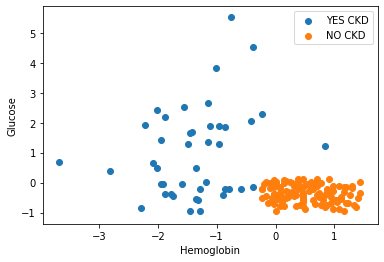

In [6]:
import matplotlib.pyplot as plt

yes_ckd_df = df[df["Class"] == 1]
no_ckd_df = df[df["Class"] == 0]

plt.scatter(x=yes_ckd_df["Hemoglobin_su"], y=yes_ckd_df["Glucose_su"], label="YES CKD" )
plt.scatter(x=no_ckd_df["Hemoglobin_su"], y=no_ckd_df["Glucose_su"], label="NO CKD" )

plt.xlabel("Hemoglobin")
plt.ylabel("Glucose")
plt.legend()

plt.show()

### Checking new patient

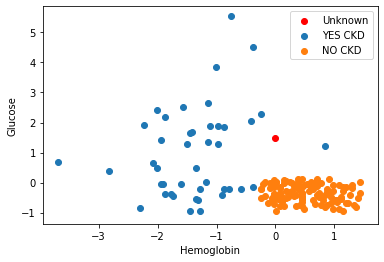

In [7]:
new_patient = [0, 1.5]

yes_ckd_df = df[df["Class"] == 1]
no_ckd_df = df[df["Class"] == 0]

plt.scatter(x=new_patient[0], y=new_patient[1], color="red", label="Unknown")

plt.scatter(x=yes_ckd_df["Hemoglobin_su"], y=yes_ckd_df["Glucose_su"], label="YES CKD" )
plt.scatter(x=no_ckd_df["Hemoglobin_su"], y=no_ckd_df["Glucose_su"], label="NO CKD" )
plt.xlabel("Hemoglobin")
plt.ylabel("Glucose")
plt.legend()

plt.show()

### Nearest neighbor

In [11]:
new_point = [0, 1.5]

**Distance between new_point and labeled points**

In [12]:
import math as m

def euclide_distance(point1_x, point1_y, point2_x, point2_y):
    temp = (point1_x - point2_x)**2 + (point1_y - point2_y)**2
    return m.sqrt(temp)

In [28]:
distances_to_new_patient = []

for index, row in df.iterrows():
    point1_x = row["Hemoglobin_su"]
    point1_y = row["Glucose_su"]
    
    distance = euclide_distance(point1_x, point1_y, new_point[0], new_point[1])
    
    distances_to_new_patient.append(distance)

df["Distance"] = distances_to_new_patient

In [30]:
# obtain 10 cloest points
df = df.sort_values(["Distance"], ascending=True)
closest_points = df.head(10)
closest_points

Hemoglobin_su  Glucose_su  WhiteBCC_su  Class  Distance
6        -0.413266    2.049282     0.360623      1  0.687386
13       -0.239236    2.296447     0.424788      1  0.831602
14        0.839750    1.215099     1.291014      1  0.886763
32       -0.865744    1.863908     5.750474      1  0.939118
35       -0.970162    1.276890    -0.345191      1  0.995486
34       -0.970162    1.879356     0.103963      1  1.041693
15       -1.144192    1.354130    -0.922675      1  1.153453
8        -1.109386    1.879356    -0.409356      1  1.172454
84       -0.030400    0.087407    -0.184779      0  1.412920
152       0.143630    0.087407     0.328540      0  1.419876

In [33]:
# find the most common "class" in the cloest points
closest_points["Class"].mode().values[0]

1

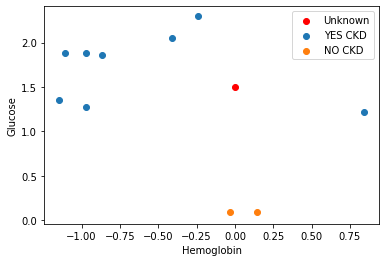

In [31]:
new_patient = [0, 1.5]

yes_ckd_df = closest_points[closest_points["Class"] == 1]
no_ckd_df = closest_points[closest_points["Class"] == 0]

plt.scatter(x=new_patient[0], y=new_patient[1], color="red", label="Unknown")

plt.scatter(x=yes_ckd_df["Hemoglobin_su"], y=yes_ckd_df["Glucose_su"], label="YES CKD" )
plt.scatter(x=no_ckd_df["Hemoglobin_su"], y=no_ckd_df["Glucose_su"], label="NO CKD" )
plt.xlabel("Hemoglobin")
plt.ylabel("Glucose")
plt.legend()

plt.show()

## Decision boundary

In [36]:
def classify(reference_points, new_point, k_neighbors=1):
    distances_to_new_patient = []

    for index, row in df.iterrows():
        point1_x = row["Hemoglobin_su"]
        point1_y = row["Glucose_su"]

        distance = euclide_distance(point1_x, point1_y, new_point[0], new_point[1])

        distances_to_new_patient.append(distance)

    reference_points["Distance"] = distances_to_new_patient
    reference_points = reference_points.sort_values(["Distance"], ascending=True)
    closest_points = reference_points.head(k_neighbors)
    
    predicted_label = closest_points["Class"].mode().values[0]
    return predicted_label
    

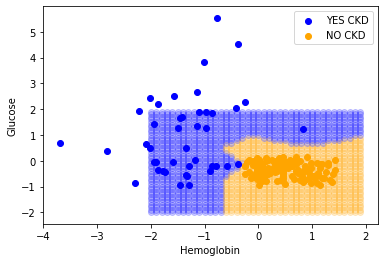

In [39]:
import numpy as np
import matplotlib.pyplot as plt

yes_ckd_df = df[df["Class"] == 1]
no_ckd_df = df[df["Class"] == 0]

hemoglobins = np.arange(-2, 2, 0.1)
glucoses = np.arange(-2, 2, 0.1)

for h in hemoglobins:
    for g in glucoses:
        new_point = [h, g]
        predicted_val = classify(df, new_point, k_neighbors=1)
        if predicted_val == 1:
            plt.scatter(x=h, y=g, color="blue", alpha=0.2)
        else:
            plt.scatter(x=h, y=g, color="orange", alpha=0.2)

plt.scatter(x=yes_ckd_df["Hemoglobin_su"], y=yes_ckd_df["Glucose_su"], color="blue", label="YES CKD" )
plt.scatter(x=no_ckd_df["Hemoglobin_su"], y=no_ckd_df["Glucose_su"], color="orange", label="NO CKD" )
plt.xlabel("Hemoglobin")
plt.ylabel("Glucose")
plt.legend()

plt.show()